# Problem statement

Analyze the dataset on students performance and develop a model that will predict a given student will pass, quantifying whether an intervention is 
necessary.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#Load dataset
students_df=pd.read_csv('student-data.csv')

In [27]:
students_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


In [28]:
students_df.shape

(395, 31)

In [29]:
students_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [30]:
students_df.index

RangeIndex(start=0, stop=395, step=1)

In [31]:
#checking the missing values
students_df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

There is no null values in the dataset.

In [32]:
#Check for duplicate rows
students_df.duplicated().sum()

0

# Preprocessing

In [33]:
students_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [34]:
students_df.drop(['reason','famsize','goout','freetime'],axis=1,inplace=True)

In [36]:
students_df=pd.get_dummies(students_df,drop_first=True)
students_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,Dalc,Walc,health,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,passed_yes
0,18,4,4,2,2,0,4,1,1,3,...,0,1,0,0,0,1,1,0,0,0
1,17,1,1,1,2,0,5,1,1,3,...,0,0,1,0,0,0,1,1,0,0
2,15,1,1,1,2,3,4,2,3,3,...,0,1,0,1,0,1,1,1,0,1
3,15,4,2,1,3,0,3,1,1,5,...,0,0,1,1,1,1,1,1,1,1
4,16,3,3,1,2,0,4,1,2,5,...,0,0,1,1,0,1,1,0,0,1


In [37]:
#Combining Mothers and Fathers Education
students_df['Pedu'] = students_df['Fedu'] + students_df['Medu']

In [40]:
x=students_df.drop(['passed_yes'],axis=1)
y=students_df['passed_yes']

In [41]:
x['Pedu']=(x['Medu']+x['Fedu'])

In [42]:
x=x.drop(['Medu','Fedu'],axis=1)

# Building the Models

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.2)

In [46]:
import warnings
warnings.filterwarnings("ignore")

### 1.Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_model= log_reg.fit(x_train,y_train)
y_pred= log_model.predict(x_test)

In [48]:
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score,confusion_matrix
f1_score(y_test,y_pred)

0.8275862068965517

In [70]:
accuracy_score(y_test,y_pred)

0.7468354430379747

In [71]:
confusion_matrix(y_test,y_pred)

array([[11, 16],
       [ 4, 48]], dtype=int64)

### 2.Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rfc=RandomForestClassifier()
random_model=rfc.fit(x_train,y_train)
y_predict=random_model.predict(x_test)
from sklearn.metrics import f1_score,confusion_matrix
f1_score(y_test,y_predict)

0.8064516129032258

In [74]:
accuracy_score(y_test,y_pred)

0.7468354430379747

In [75]:
confusion_matrix(y_test,y_predict)

array([[ 5, 22],
       [ 2, 50]], dtype=int64)

In [76]:
#feature importance
pd.Series(rfc.feature_importances_,index=x.columns).sort_values(ascending=False)*100

absences           10.744326
Pedu                7.666401
failures            7.560873
age                 6.554398
health              5.243245
Walc                5.007639
famrel              4.772940
studytime           4.397501
Dalc                3.503256
traveltime          3.377884
paid_yes            3.011134
schoolsup_yes       2.656617
famsup_yes          2.562270
Mjob_other          2.518148
guardian_mother     2.237143
Mjob_services       2.221915
romantic_yes        2.217125
sex_M               2.187865
activities_yes      2.153906
nursery_yes         2.116162
Fjob_other          1.992632
address_U           1.923631
higher_yes          1.920567
Fjob_services       1.815940
internet_yes        1.813145
Mjob_teacher        1.475565
school_MS           1.367318
guardian_other      1.254178
Pstatus_T           1.085773
Fjob_health         1.011580
Mjob_health         0.976076
Fjob_teacher        0.652846
dtype: float64

### 3.K Nearest Neighbor

In [77]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors= np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_predict= classifier.predict(x_test)
    acc= accuracy_score(y_test,y_predict)
    acc_values.append(acc)

In [78]:
acc_values

[0.5949367088607594,
 0.6075949367088608,
 0.6708860759493671,
 0.6582278481012658,
 0.6582278481012658,
 0.7088607594936709,
 0.6582278481012658,
 0.6582278481012658,
 0.6582278481012658,
 0.6708860759493671,
 0.6708860759493671,
 0.6962025316455697]

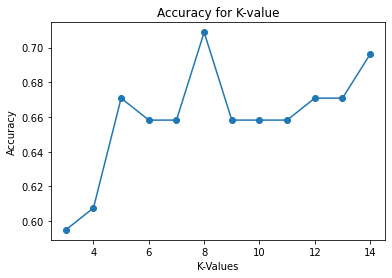

In [79]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('Accuracy for K-value')
plt.show()

In [80]:
f1_score(y_test,y_predict)

0.8032786885245902

In [81]:
confusion_matrix(y_test,y_predict)

array([[ 6, 21],
       [ 3, 49]], dtype=int64)

### 4.Support Vector Machine

In [82]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
y_predict= svm.predict(x_test)

In [83]:
f1_score(y_test,y_predict)

0.8135593220338984

In [84]:
accuracy_score(y_test,y_pred)

0.7468354430379747

In [66]:
confusion_matrix(y_test,y_predict)

array([[ 9, 18],
       [ 4, 48]], dtype=int64)

### 5.Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_predict =dt_model.predict(x_test)

In [86]:
f1_score(y_test,y_predict)

0.7428571428571428

In [87]:
confusion_matrix(y_test,y_predict)

array([[13, 14],
       [13, 39]], dtype=int64)

In [88]:
accuracy_score(y_test,y_pred)

0.7468354430379747

### Conclusion

From the F-score logistic regression is giving better results.By using feature importance in randomforest we got important features are absences,Pedu,failures,age,health,Walc,famrel,studytime,Dalc,traveltime.